In [1]:
# Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\NEXT\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

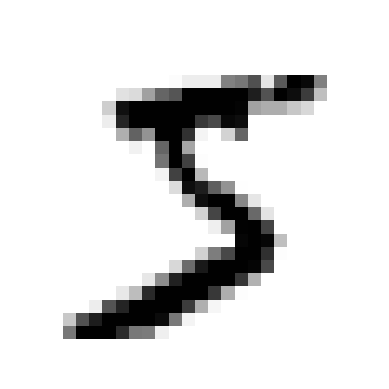

In [6]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [9]:
# 5-detector

y_train_5 = (y_train =='5') # True for all 5s, False for all other digits
y_test_5 = (y_test =='5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measure

### Measuring accuracy Using Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
# 95% accuracy

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [15]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
# what's the perfections looks like. 

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision

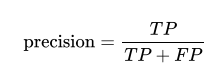

### Recall

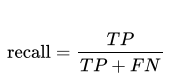

### Confusion Matrix representation

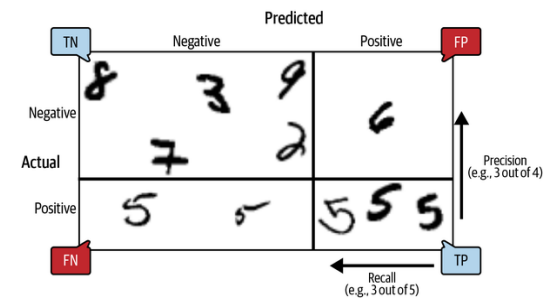

In [19]:
# part1 end. 

### Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

## f1- Score 

### f1 score is the harmonic mean of precision and recall 

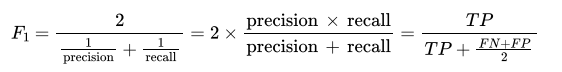

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### The Precision/recall trade-off

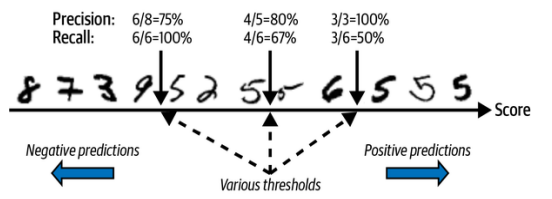

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, 
                            method='decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

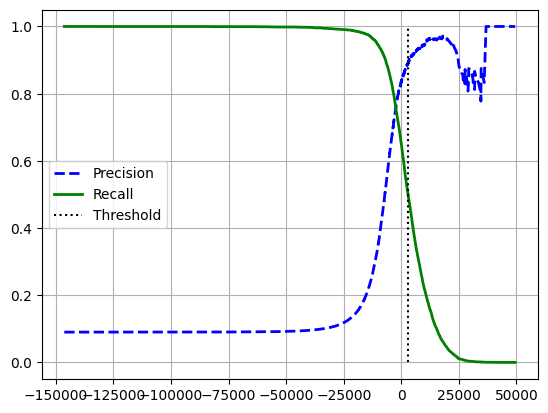

In [28]:
plt.plot(thresholds, precision[:-1], "b--", label = 'Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label = 'Recall', linewidth=2)
plt.vlines(threshold, 0,1.0, "k", "dotted", label = 'Threshold')
plt.grid()
plt.legend()
plt.show();


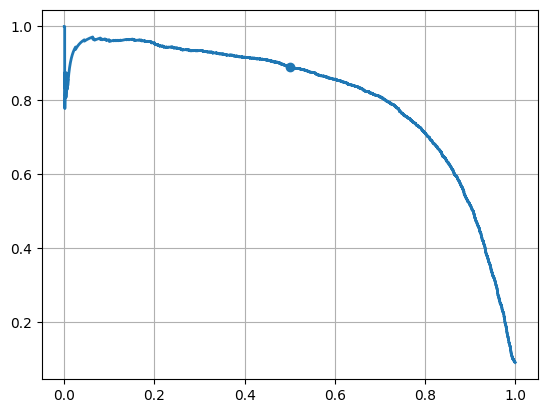

In [36]:
plt.plot(recall, precision, linewidth =2 , label = "Precision/Recall Curve")
plt.scatter(x = 0.5, y = 0.89)
plt.grid()

In [45]:
idx_for_90_precision = (precision >=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [47]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [48]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [49]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### ROC Curve - Reciever Operating Characteristic

In [69]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

In [77]:
idx_for_thresholds_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90 , fpr_90 = tpr[idx_for_thresholds_at_90], fpr[idx_for_thresholds_at_90]

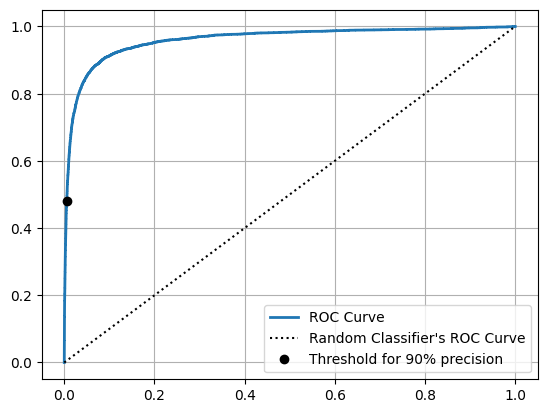

In [78]:
plt.plot(fpr, tpr, linewidth = 2, label= "ROC Curve")
plt.plot([0,1],[0,1], 'k:', label = "Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90],"ko", label = "Threshold for 90% precision")
plt.grid()
plt.legend()

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [81]:
# Lets create a RandomForestClassifier whose PR curve and F1 score can compare to SGDClassifier

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [84]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 5, method="predict_proba")

In [85]:
y_probas_forest[:2]

array([[0.14, 0.86],
       [0.99, 0.01]])

In [86]:
y_score_forest = y_probas_forest[:,1]
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train_5, y_score_forest)

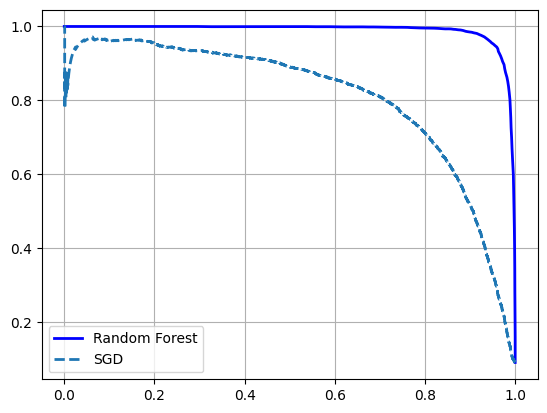

In [90]:
plt.plot(recall_forest, precision_forest, "b-", linewidth = 2, 
        label = "Random Forest")
plt.plot(recall, precision, "--" , linewidth=2, label = "SGD")
plt.legend()
plt.grid()
plt.show()

In [96]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5 # positive proba >=50%
f1_score(y_train_5, y_train_pred_forest)

0.9314961399394116

In [94]:
roc_auc_score(y_train_5, y_score_forest)

0.998402186461512

In [97]:
# End of Part - 2

## Multiclass Classification

In [98]:
from sklearn.svm import SVC
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [99]:
svc_clf.predict([some_digit])

array(['5'], dtype=object)

In [104]:
some_digit_scores = svc_clf.decision_function([some_digit])
some_digit_scores.round(2) # highest score is 9.3

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [105]:
class_id = some_digit_scores.argmax()
class_id

5

In [106]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [107]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [108]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [109]:
len(ovr_clf.estimators_)

10

In [111]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [112]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [114]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis

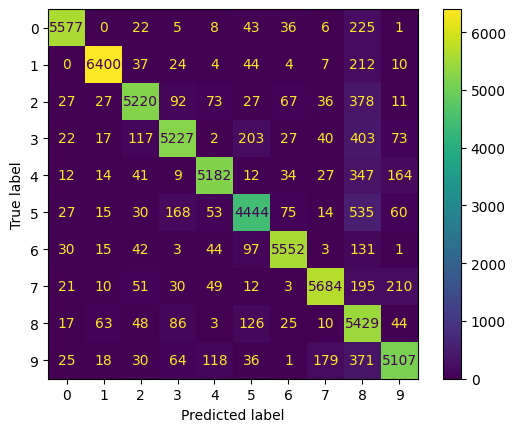

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

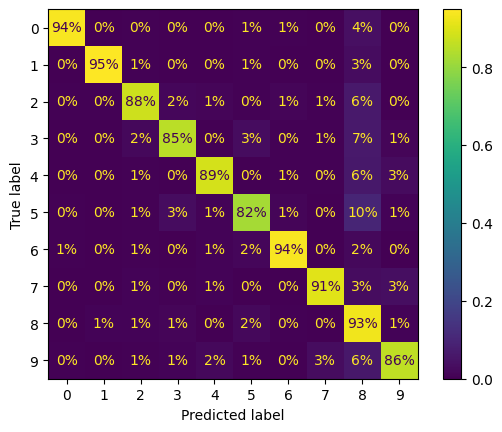

In [122]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format=  ".0%")
plt.show()

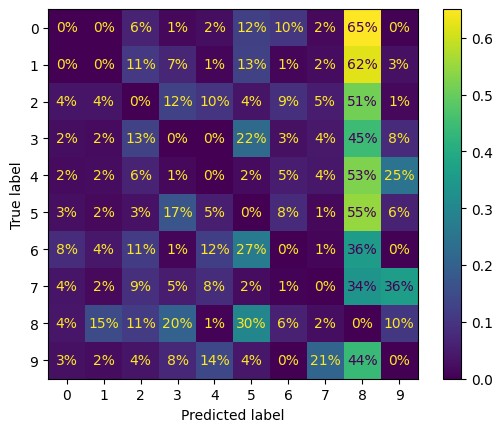

In [127]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                       sample_weight= sample_weight, normalize = "true", 
                                       values_format=".0%")

## Multilabel Classification

In [131]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype('int8') >=7)
y_train_odd = (y_train.astype('int8')%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [132]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [141]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.976410265560605

In [135]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [136]:
chain_clf.predict([some_digit])

array([[0., 1.]])

## Multioutput Classification

In [139]:
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

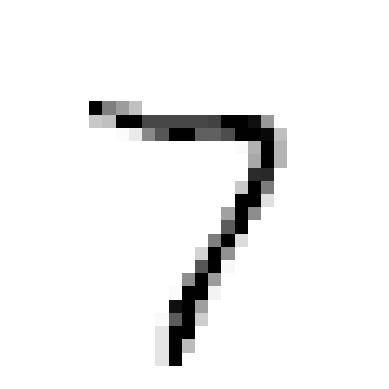

In [140]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()